In [1]:
import pandas as pd
from ensemble import StdForestClassifier
from category_encoders.m_estimate import MEstimateEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier
import shap
import numpy as np
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler

In [11]:
df = pd.read_csv('data/train_transaction.csv')

In [12]:
df = df.iloc[:, :-300]
#df = df.sample(frac=0.1)
undersample = RandomUnderSampler(sampling_strategy=0.5)

In [13]:
X = df.drop(columns=['TransactionID', 'isFraud', 'TransactionDT'])
y = df[['isFraud']]

In [16]:
X,y = undersample.fit_resample(X,y)

In [17]:
X = X.fillna(-1)

In [18]:
X = MEstimateEncoder().fit_transform(X,y)

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


In [19]:
X_tr, X_te, y_tr, y_te = train_test_split(X,y,stratify=y,test_size=0.1)

In [20]:
rf = RandomForestClassifier(n_estimators= 10)

In [22]:
%%time
rf.fit(X_tr,y_tr)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


CPU times: user 1.04 s, sys: 35.3 ms, total: 1.08 s
Wall time: 1.1 s


RandomForestClassifier(n_estimators=10)

In [23]:
print(classification_report(rf.predict(X_te),y_te))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      4431
           1       0.75      0.88      0.81      1768

    accuracy                           0.88      6199
   macro avg       0.85      0.88      0.86      6199
weighted avg       0.89      0.88      0.88      6199



Feature ranking:
1. feature 0 (0.056065)
2. feature 2 (0.046894)
3. feature 26 (0.042051)
4. feature 14 (0.039157)
5. feature 3 (0.038923)
6. feature 39 (0.034378)
7. feature 27 (0.034223)
8. feature 8 (0.031865)
9. feature 29 (0.029464)
10. feature 13 (0.028162)
11. feature 15 (0.026189)
12. feature 25 (0.024686)
13. feature 12 (0.023139)
14. feature 30 (0.022319)
15. feature 42 (0.020901)
16. feature 28 (0.020804)
17. feature 23 (0.019879)
18. feature 6 (0.019604)
19. feature 24 (0.018938)
20. feature 18 (0.018886)
21. feature 21 (0.018664)
22. feature 19 (0.018585)
23. feature 37 (0.017707)
24. feature 20 (0.016177)
25. feature 31 (0.016168)
26. feature 32 (0.015795)
27. feature 7 (0.014916)
28. feature 10 (0.014631)
29. feature 34 (0.013322)
30. feature 35 (0.012955)
31. feature 84 (0.011859)
32. feature 38 (0.011855)
33. feature 46 (0.010768)
34. feature 22 (0.010219)
35. feature 5 (0.009838)
36. feature 81 (0.008809)
37. feature 17 (0.007871)
38. feature 48 (0.007756)
39. feature

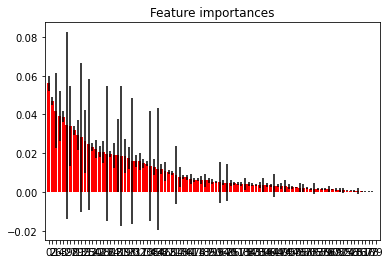

In [24]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()